In [1]:
import glob
import re
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

matplotlib.rcParams['xtick.labelsize']=10
matplotlib.rcParams['ytick.labelsize']=10
matplotlib.rcParams['font.size']=15
matplotlib.rcParams['legend.fontsize']=10
matplotlib.rcParams['axes.labelsize']=10
matplotlib.rcParams['text.latex.preamble']=[r'\usepackage{bm}', r'\usepackage{textgreek}', r'\usepackage{sfmath}', r'\usepackage{siunitx}', r'\sisetup{per-mode=reciprocal}    ', r'\DeclareSIUnit\Molar{M}']
#matplotlib.rc('text',usetex=True)

/var/folders/2t/py1xp77n1r5gmz9pppl024n40000gn/T/ipykernel_42581/3277952956.py:14: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble']=[r'\usepackage{bm}', r'\usepackage{textgreek}', r'\usepackage{sfmath}', r'\usepackage{siunitx}', r'\sisetup{per-mode=reciprocal}    ', r'\DeclareSIUnit\Molar{M}']


In [2]:
path = '/Volumes/bindgen_PhD/genius_scratch/strainrate_sweep_51361453/'
path = '/Volumes/bindgen_PhD/genius_scratch/strainrate_sweep_51362045/'
dirs = glob.glob(path + 'caps_analysis_box_l_11.0_protocol_conti_shear_vel_*')
dirs = np.sort(dirs)
print(dirs)

['/Volumes/bindgen_PhD/genius_scratch/strainrate_sweep_51362045/caps_analysis_box_l_11.0_protocol_conti_shear_vel_0.00010'
 '/Volumes/bindgen_PhD/genius_scratch/strainrate_sweep_51362045/caps_analysis_box_l_11.0_protocol_conti_shear_vel_0.00016'
 '/Volumes/bindgen_PhD/genius_scratch/strainrate_sweep_51362045/caps_analysis_box_l_11.0_protocol_conti_shear_vel_0.00025'
 '/Volumes/bindgen_PhD/genius_scratch/strainrate_sweep_51362045/caps_analysis_box_l_11.0_protocol_conti_shear_vel_0.00040'
 '/Volumes/bindgen_PhD/genius_scratch/strainrate_sweep_51362045/caps_analysis_box_l_11.0_protocol_conti_shear_vel_0.00063'
 '/Volumes/bindgen_PhD/genius_scratch/strainrate_sweep_51362045/caps_analysis_box_l_11.0_protocol_conti_shear_vel_0.00100'
 '/Volumes/bindgen_PhD/genius_scratch/strainrate_sweep_51362045/caps_analysis_box_l_11.0_protocol_conti_shear_vel_0.00158'
 '/Volumes/bindgen_PhD/genius_scratch/strainrate_sweep_51362045/caps_analysis_box_l_11.0_protocol_conti_shear_vel_0.00251'
 '/Volumes/bindg

In [3]:
box_lengths = []
velocities = []
#f_files
for dir in dirs:
    data = re.findall(
        r'[-+]?([0-9]*\.[0-9]+|[0-9]+)_protocol_conti_shear_vel_[-+]?([0-9]*\.[0-9]+|[0-9]+)',
        dir)
    #print(data[0][0])
    #print(data[0][1])
    box_lengths = np.append(box_lengths, float(data[0][0]))
    velocities = np.append(velocities, float(data[0][1]))
    
print(box_lengths)
print(velocities)
shear_rates = velocities / box_lengths

[11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11.]
[1.0000e-04 1.6000e-04 2.5000e-04 4.0000e-04 6.3000e-04 1.0000e-03
 1.5800e-03 2.5100e-03 3.9800e-03 6.3100e-03 1.0000e-02 1.5850e-02
 2.5120e-02 3.9810e-02 6.3100e-02 1.0000e-01 1.5849e-01 2.5119e-01
 3.9811e-01 6.3096e-01 1.0000e+00]


['/Volumes/bindgen_PhD/genius_scratch/strainrate_sweep_51362045/caps_analysis_box_l_11.0_protocol_conti_shear_vel_0.00010/vtk_out', '/Volumes/bindgen_PhD/genius_scratch/strainrate_sweep_51362045/caps_analysis_box_l_11.0_protocol_conti_shear_vel_0.00010/structures', '/Volumes/bindgen_PhD/genius_scratch/strainrate_sweep_51362045/caps_analysis_box_l_11.0_protocol_conti_shear_vel_0.00010/vtk_out_part', '/Volumes/bindgen_PhD/genius_scratch/strainrate_sweep_51362045/caps_analysis_box_l_11.0_protocol_conti_shear_vel_0.00010/numbers.dat', '/Volumes/bindgen_PhD/genius_scratch/strainrate_sweep_51362045/caps_analysis_box_l_11.0_protocol_conti_shear_vel_0.00010/part_stress.dat', '/Volumes/bindgen_PhD/genius_scratch/strainrate_sweep_51362045/caps_analysis_box_l_11.0_protocol_conti_shear_vel_0.00010/fluid_stress.dat']
['/Volumes/bindgen_PhD/genius_scratch/strainrate_sweep_51362045/caps_analysis_box_l_11.0_protocol_conti_shear_vel_0.00016/vtk_out', '/Volumes/bindgen_PhD/genius_scratch/strainrate_swee

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

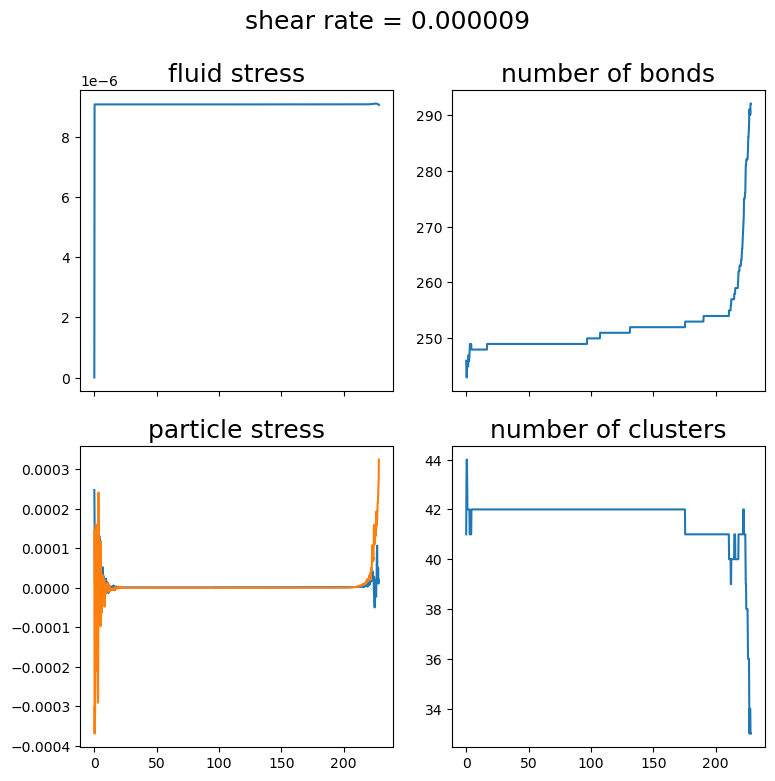

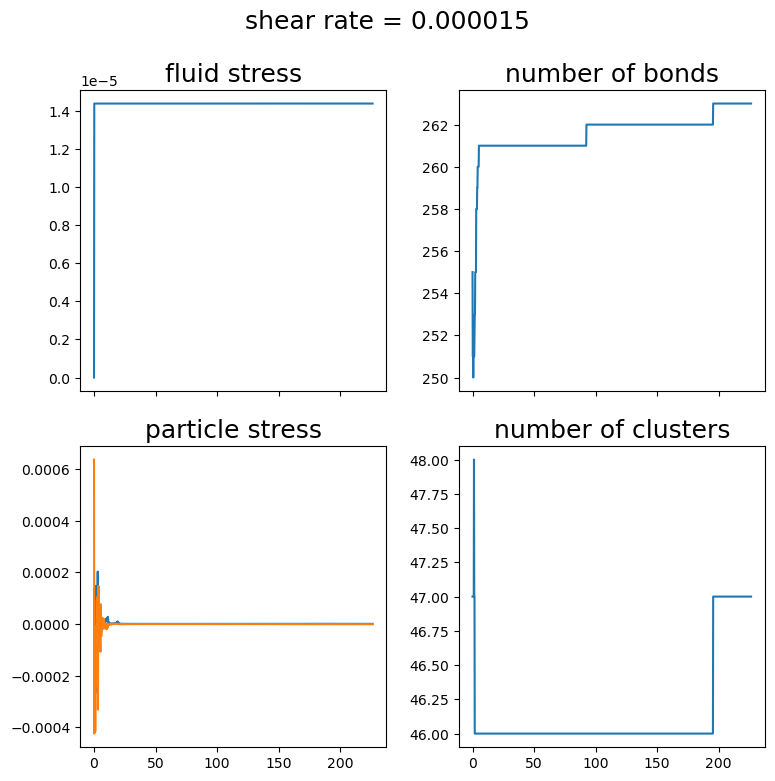

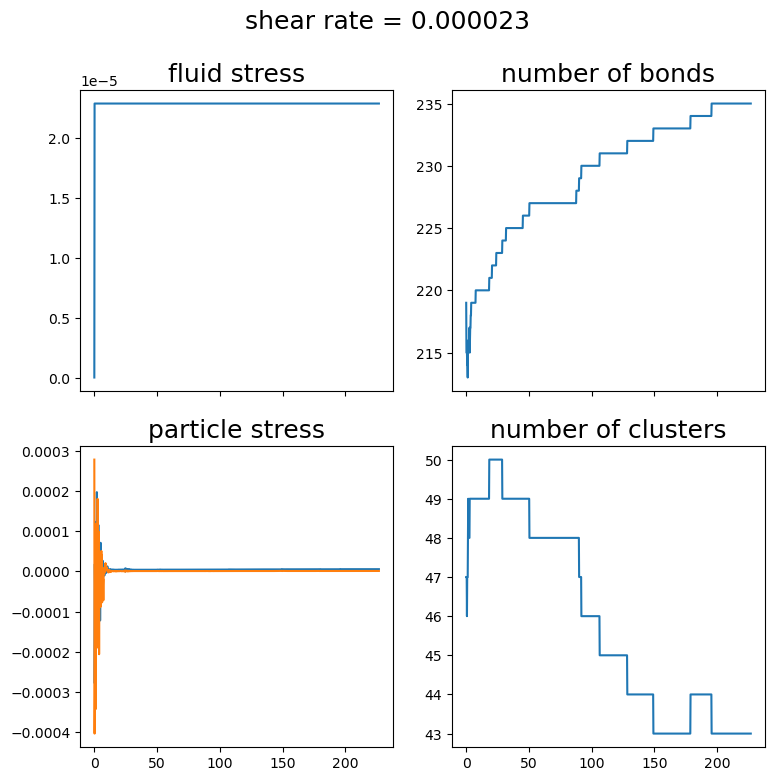

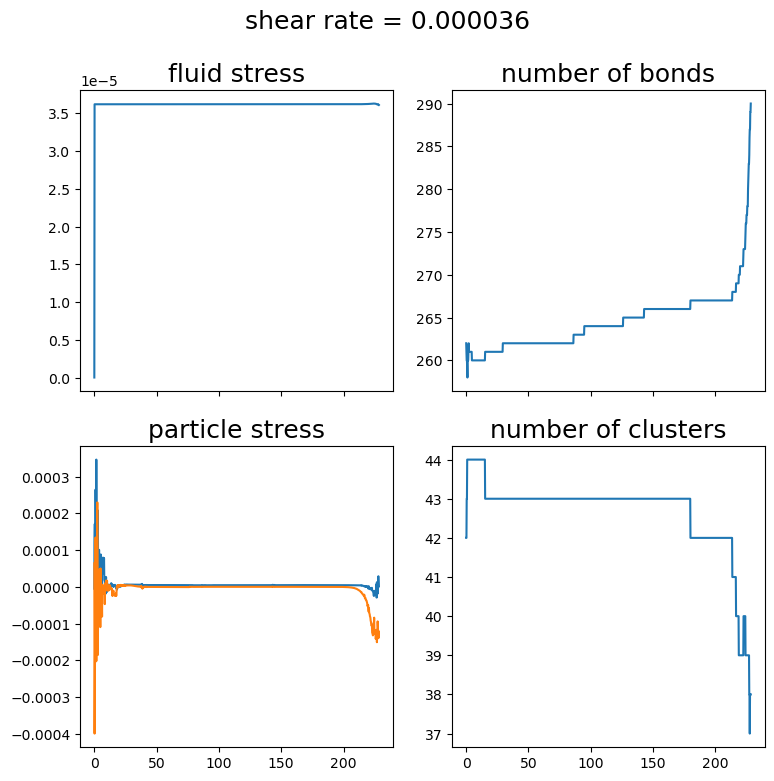

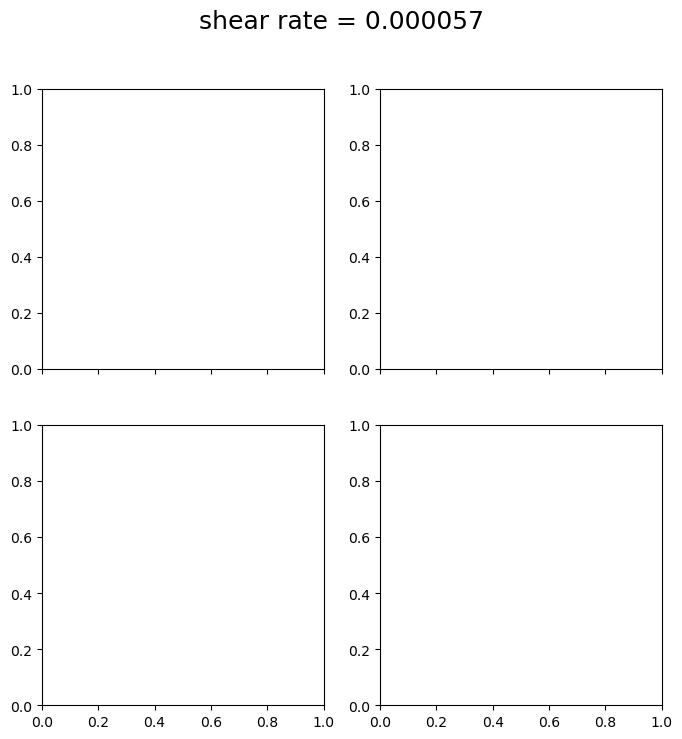

In [5]:
i = 0
for dir in dirs:
    print(glob.glob(dir + '/*'))
    numbers = np.genfromtxt(dir + '/numbers.dat', delimiter = ';')
    p_stress = np.genfromtxt(dir + '/part_stress.dat', delimiter = ';')
    fluid_stress = np.genfromtxt(dir + '/fluid_stress.dat', delimiter = ';')
    #print(fluid_stress)
    
    fig, axs = plt.subplots(2,2, sharex = True, figsize = (8,8))
    fig.suptitle('shear rate = {:.6f}'.format(shear_rates[i]))
    
    axs[0,0].plot(fluid_stress[:,0], -fluid_stress[:,3])
    axs[0,0].set_title('fluid stress')
    axs[1,0].plot(p_stress[:,0], p_stress[:,3])
    axs[1,0].plot(p_stress[:,0], p_stress[:,6])
    axs[1,0].set_title('particle stress')
    axs[0,1].plot(numbers[:,0], numbers[:,2])
    axs[0,1].set_title('number of bonds')
    axs[1,1].plot(numbers[:,0], numbers[:,3])
    axs[1,1].set_title('number of clusters')
    
    fig.tight_layout()
    
    i += 1

In [ ]:
fig, axs = plt.subplots(4, 1, sharex = True, figsize = (10,20))
#fig.suptitle('shear rate = {:.6f}'.format(shear_rates[i]))

for i in np.arange(len(dirs), step=2):
    dir = dirs[i]
    #print(glob.glob(dir + '/*'))
    numbers = np.genfromtxt(dir + '/numbers.dat', delimiter = ';')
    p_stress = np.genfromtxt(dir + '/part_stress.dat', delimiter = ';')
    fluid_stress = np.genfromtxt(dir + '/fluid_stress.dat', delimiter = ';')
    #print(fluid_stress)

    
    axs[0].plot(fluid_stress[:,0], -fluid_stress[:,3], label = 'shear rate = {:.6f}'.format(shear_rates[i]))
    axs[0].set_title('fluid stress')
    axs[1].plot(p_stress[:,0], +p_stress[:,3], label = 'shear rate = {:.6f}'.format(shear_rates[i]))
    axs[1].set_title('particle stress')
    axs[2].plot(numbers[:,0], numbers[:,2], label = 'shear rate = {:.6f}'.format(shear_rates[i]))
    axs[2].set_title('number of bonds')
    axs[3].plot(numbers[:,0], numbers[:,3], label = 'shear rate = {:.6f}'.format(shear_rates[i]))
    axs[3].set_title('number of clusters')
    
    fig.tight_layout()
    
axs[0].legend()
axs[0].loglog()
axs[1].legend()
axs[1].loglog()
axs[2].legend()
axs[3].legend()